# <font color = salmon> Multiple Agents - Single Function (ie Tool))

## <font color = grey> Deploying Simple App (No Nginx) --> Move all code to Flask App. Only Inference on Page
#### <font color = grey> Conda Env: <font color = pink> 20240717_Autogen_Nginx

---

### <font color = Olive> Admin

#### <font color = darkgrey> Imports

In [1]:
############################## Imports & Display Options ###############################################

import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
import os
import autogen


from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

########################### Set Base Directory #########################################################

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

################################# Set Working Directory ##############################################

# target_directory = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/12.Agents_TOI_AutoGen')

target_directory = os.path.join(base_dir, '/home/ubuntu/efs-w210-capstone-ebs/12.Agents_TOI_AutoGen/20240629_06.Tool_Use/')

# efs-w210-capstone/200015/12.Agents_TOI_AutoGen/20240629_02.Multi-Agent Collaboration (>3 Agents)

# # Change to the target directory
os.chdir(target_directory)
print(f"Changed directory to: {os.getcwd()}")

################################### Set API Keys #####################################################

os.environ['OPENAI_API_KEY'] = 'sk-proj-iQtcgUJOOf4n53Bs6uyqT3BlbkFJnEIqUeEwXjbjVMcDVqiz'

################################# Check Agent Setup - Sample ##########################################

from autogen import ConversableAgent

config_list = [
    {"model": "gpt-4o", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
    {"model": "gpt-4-turbo-preview", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
    {"model": "gpt-4", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
    {"model": "gpt-4-0314", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
    {"model": "gpt4", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
    {"model": "gpt-4-32k", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
    {"model": "gpt-4-32k-0314", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"},
    {"model": "gpt-4-32k-v0314", "api_key": os.environ.get("OPENAI_API_KEY"), "api_type": "openai"}
]

llm_config={
    # "request_timeout": 600,
    "seed": 42,
    "config_list": config_list,
    "temperature": 0
}

# agent = ConversableAgent(
#     "chatbot",
#     llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ.get("OPENAI_API_KEY")}]},
#     code_execution_config=False,  # Turn off code execution, by default it is off.
#     function_map=None,  # No registered functions, by default it is None.
#     human_input_mode="NEVER",  # Never ask for human input.
# )

# reply = agent.generate_reply(messages=[{"content": "Tell me a joke.", "role": "user"}])
# print(reply)


################################# Tools Setup ##########################################

os.environ["SERPAPI_API_KEY"] = "6d6dd5330f69328aabc9a71bfd69477819748a56"


###################################### REFERENCE ONLY --> DOES NOT WORK FOR SINGLE CHATS #############

# for i, chat_res in enumerate(chat_results):
#     print(f"*****{i}th chat*******:")
#     print(chat_res.summary)
#     print("Human input in the middle:", chat_res.human_input)
#     print("Conversation cost: ", chat_res.cost)
#     if i == 1:
#         assert (
#             len(chat_res.chat_history) == 4
#         ), f"The chat history should contain at most 4 messages because max_turns is set to 2 in the {i}-th chat."
#     print("\n\n")

# # Get the chat history.
# import pprint

# pprint.pprint(reply.chat_history)

# # Get the cost of the chat.
# pprint.pprint(reply.cost)

Base directory set to: /home/sagemaker-user
Changed directory to: /home/ubuntu/efs-w210-capstone-ebs/12.Agents_TOI_AutoGen/20240629_06.Tool_Use


In [2]:
import autogen
from typing import Literal
from pydantic import BaseModel, Field
from typing_extensions import Annotated
import requests
from autogen.cache import Cache

## <font color = coral> 3 Files

> 1 .py and 2 html files

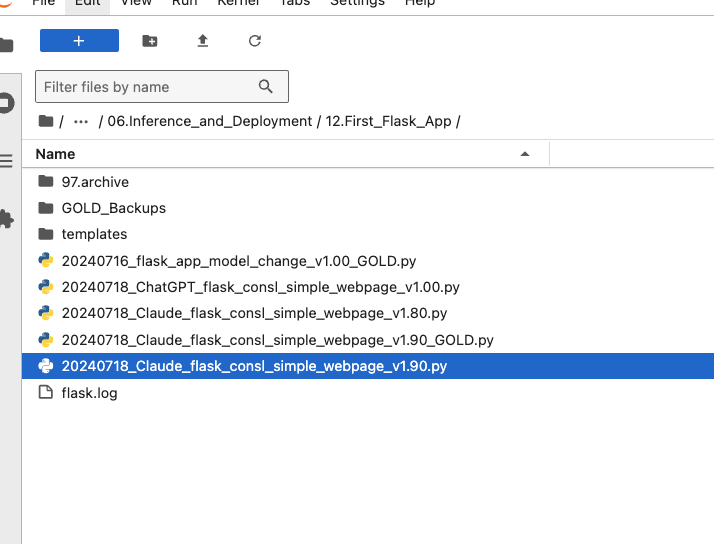

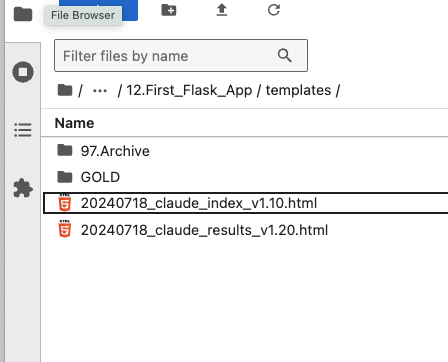

#### <font color = grey>v1.90

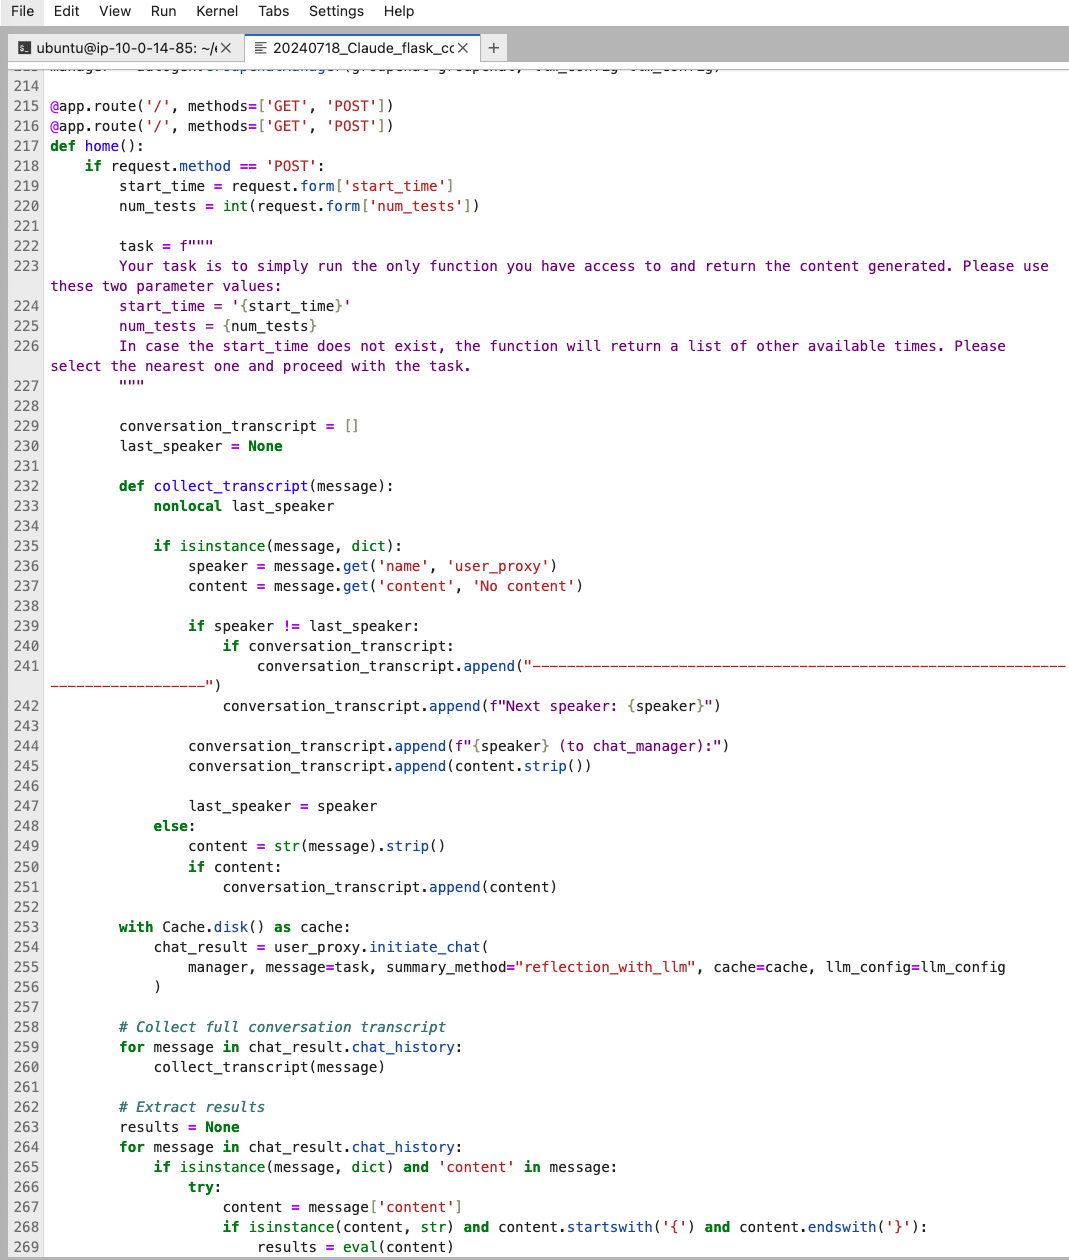

---

# <font color = tomato> Inference --> Use Case 1: Default Parameters (Hardcoded)
### <font color = blue> To get the basic html index page working

#### index.html
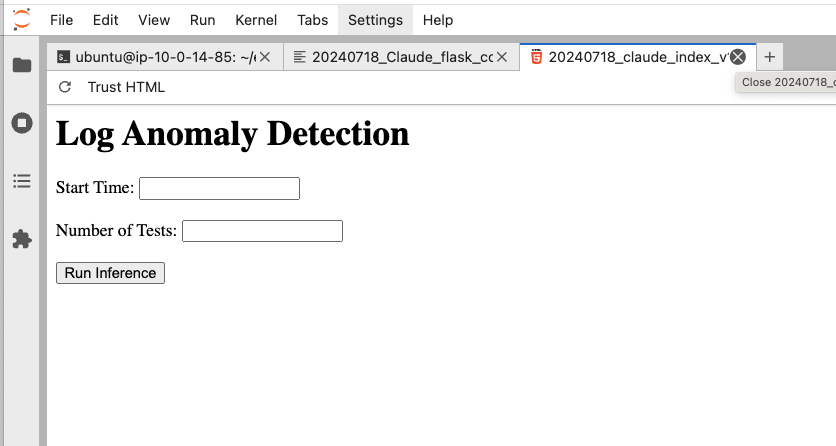

#### results.html
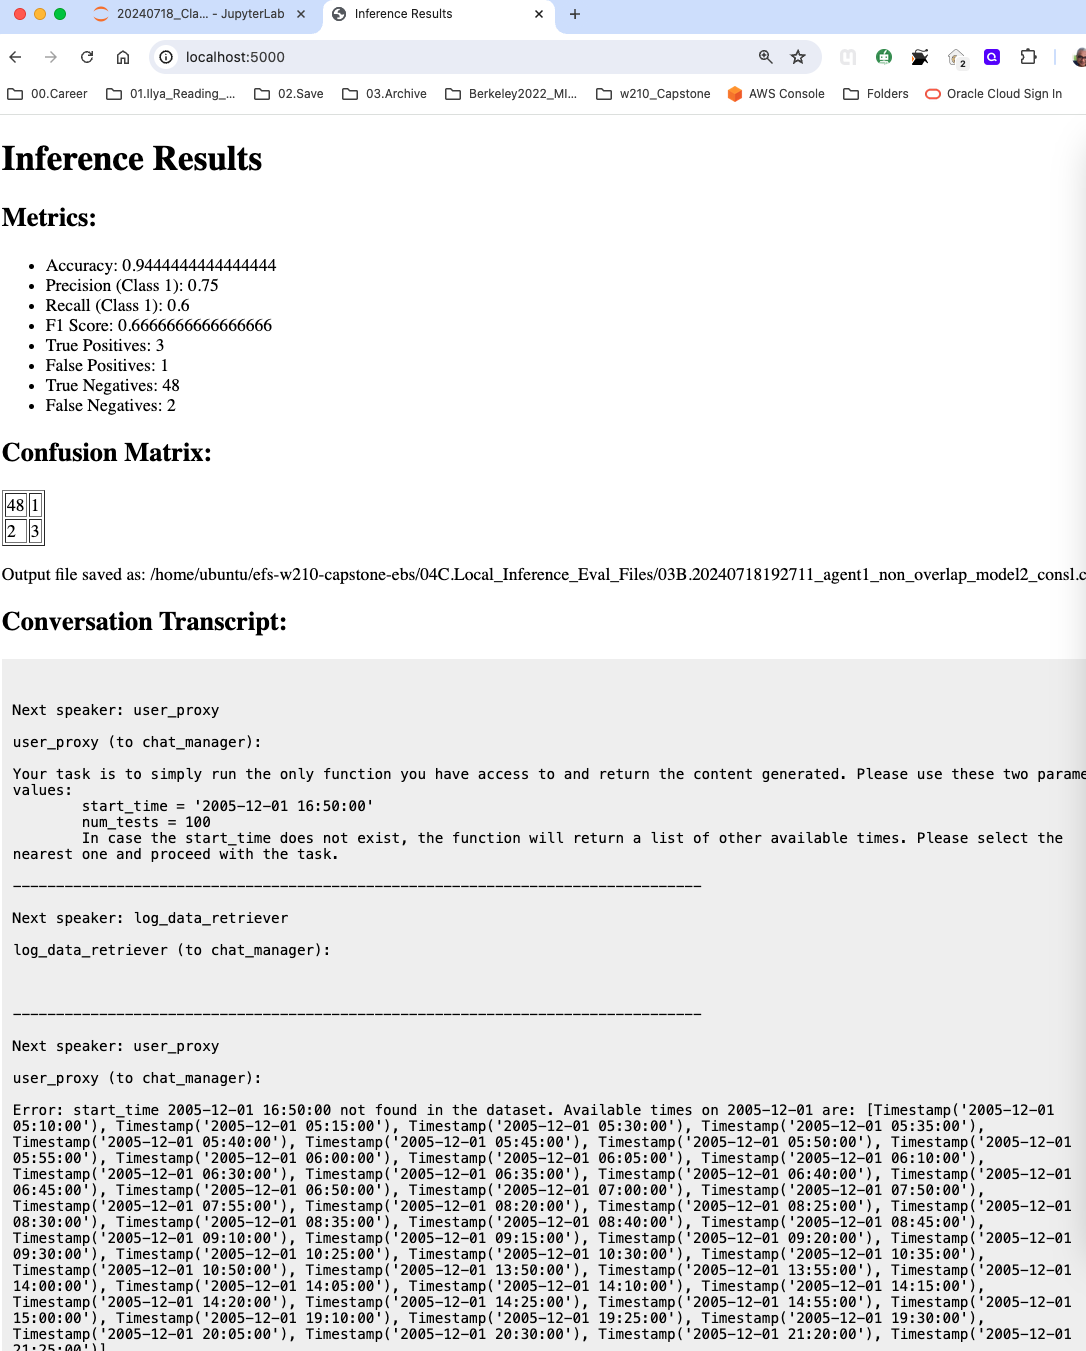
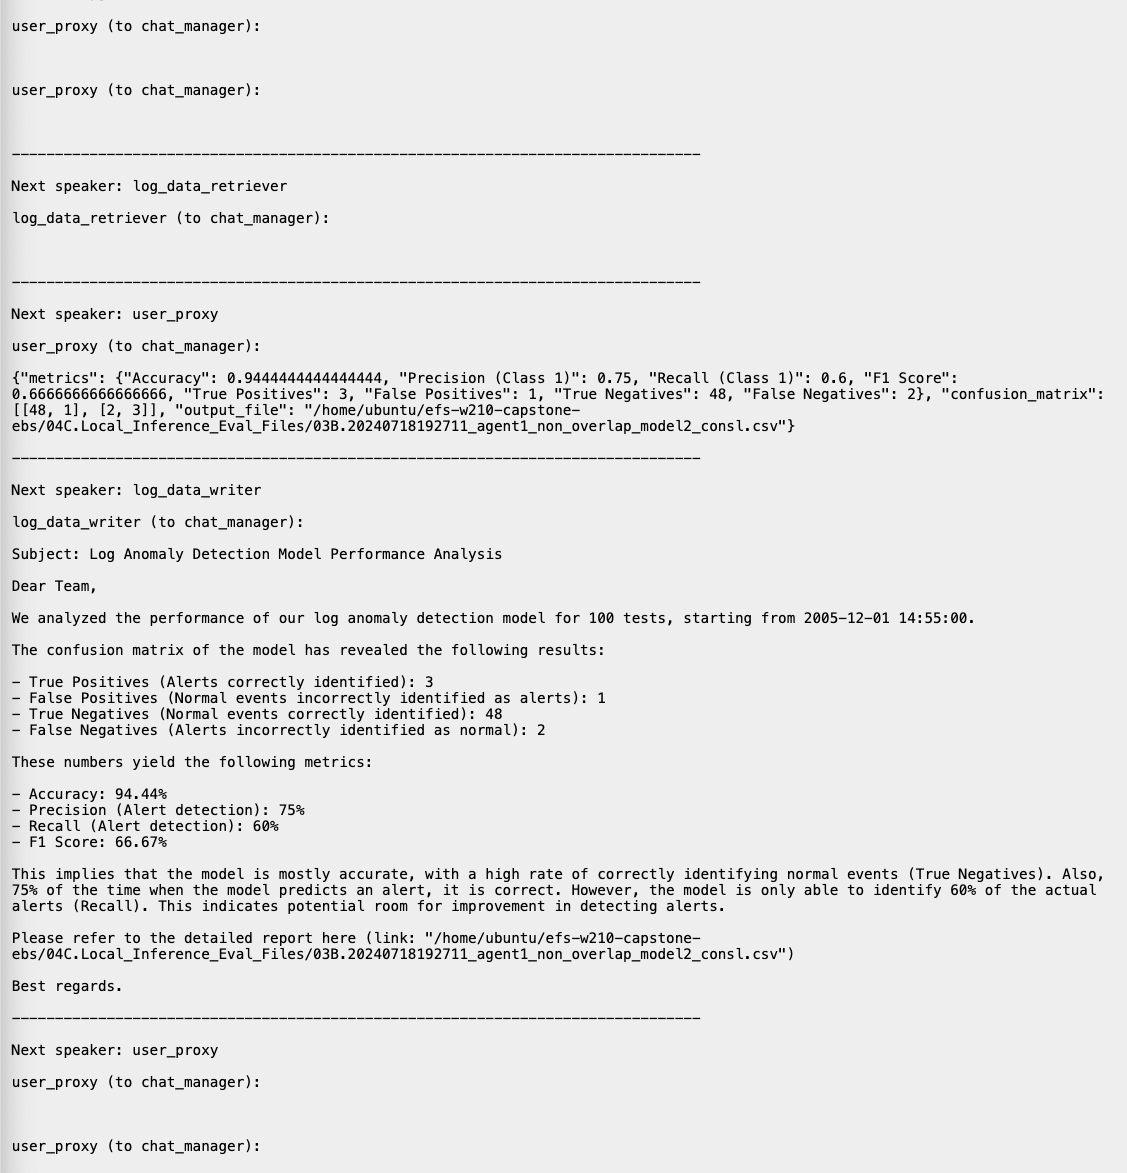

---

### <font color = blue> Check Flask Transcript

##### <font color = tomato> Matches with the results.html output

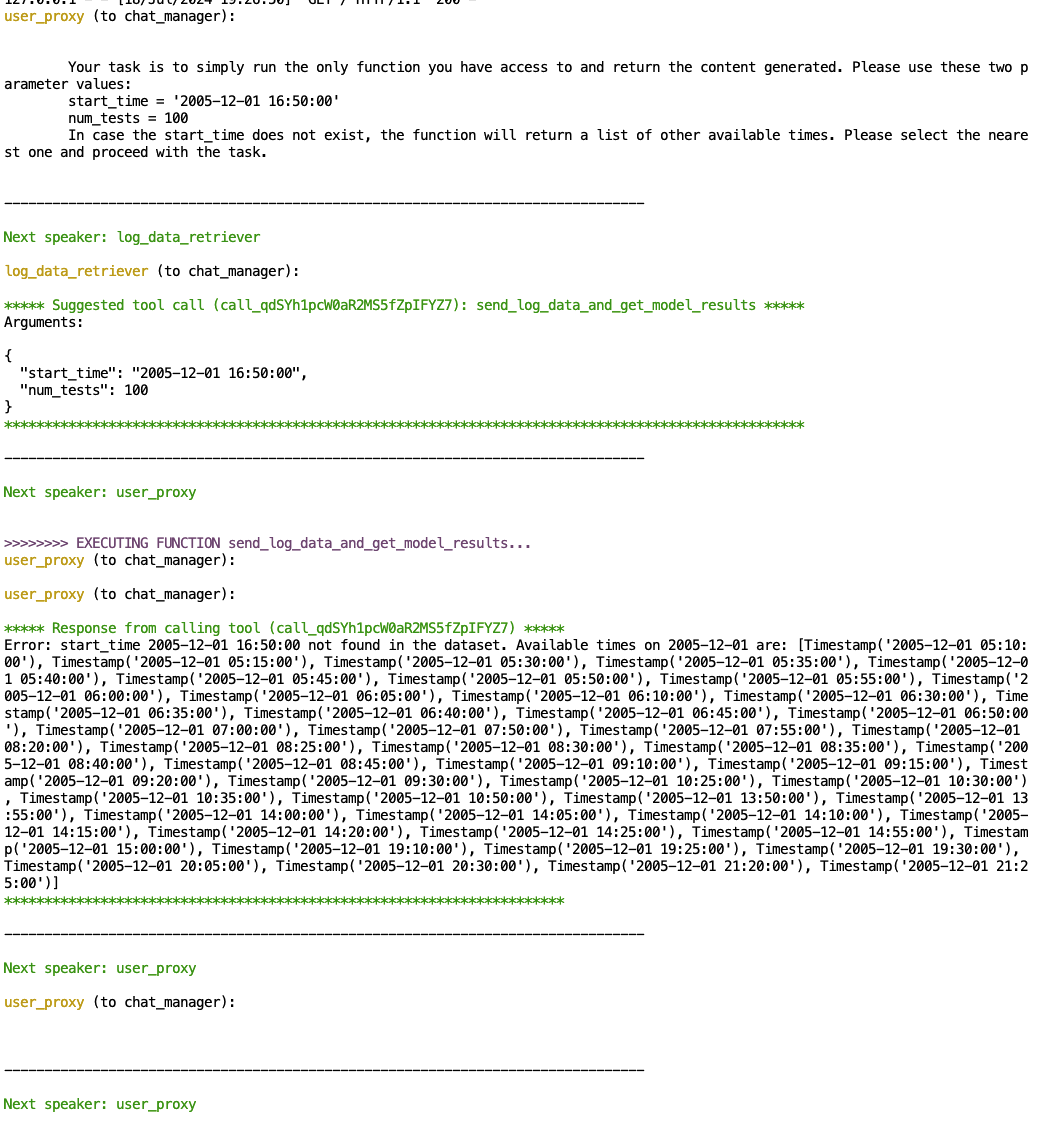

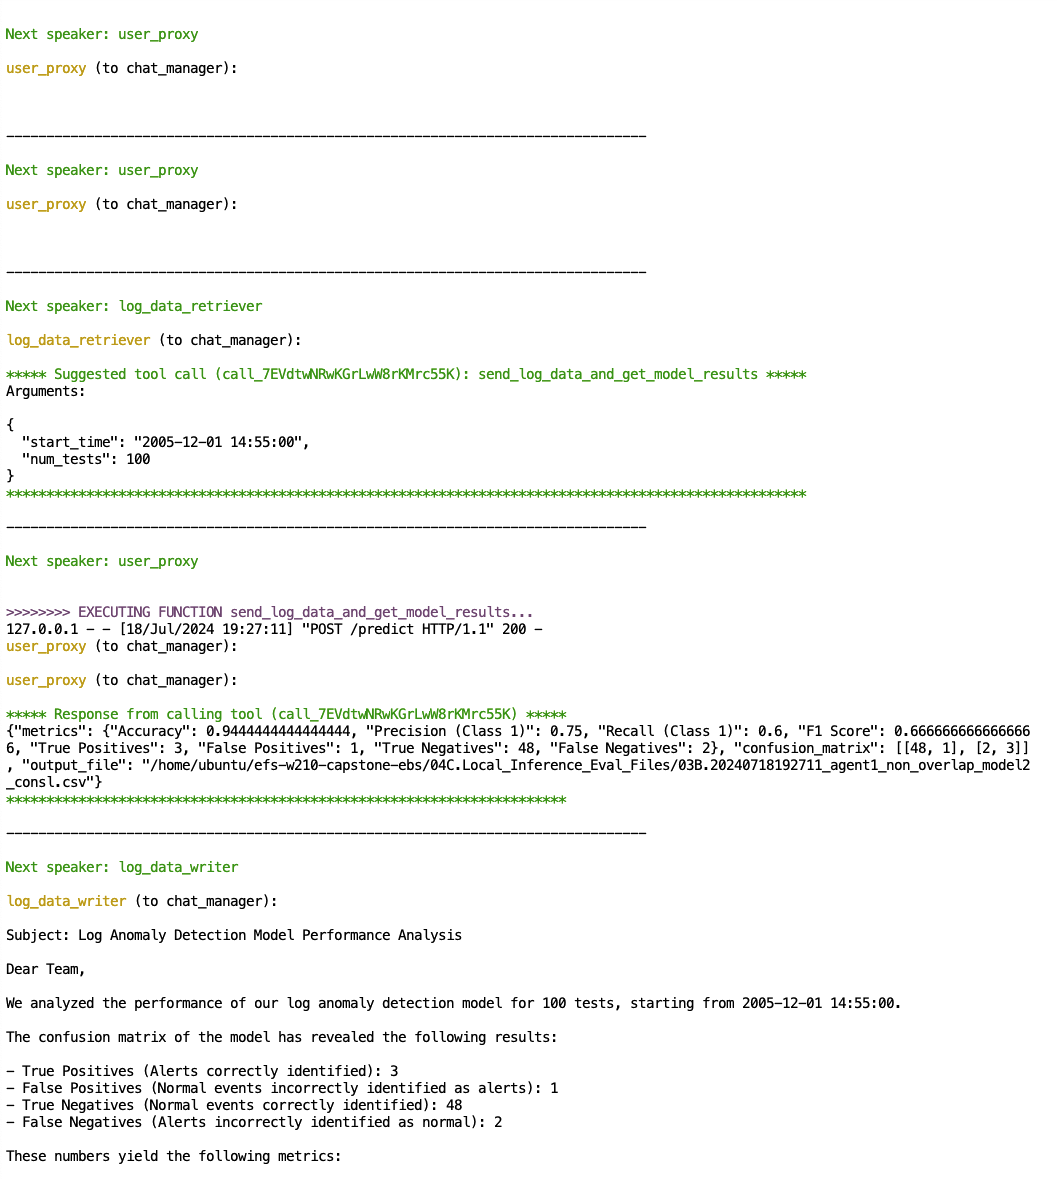

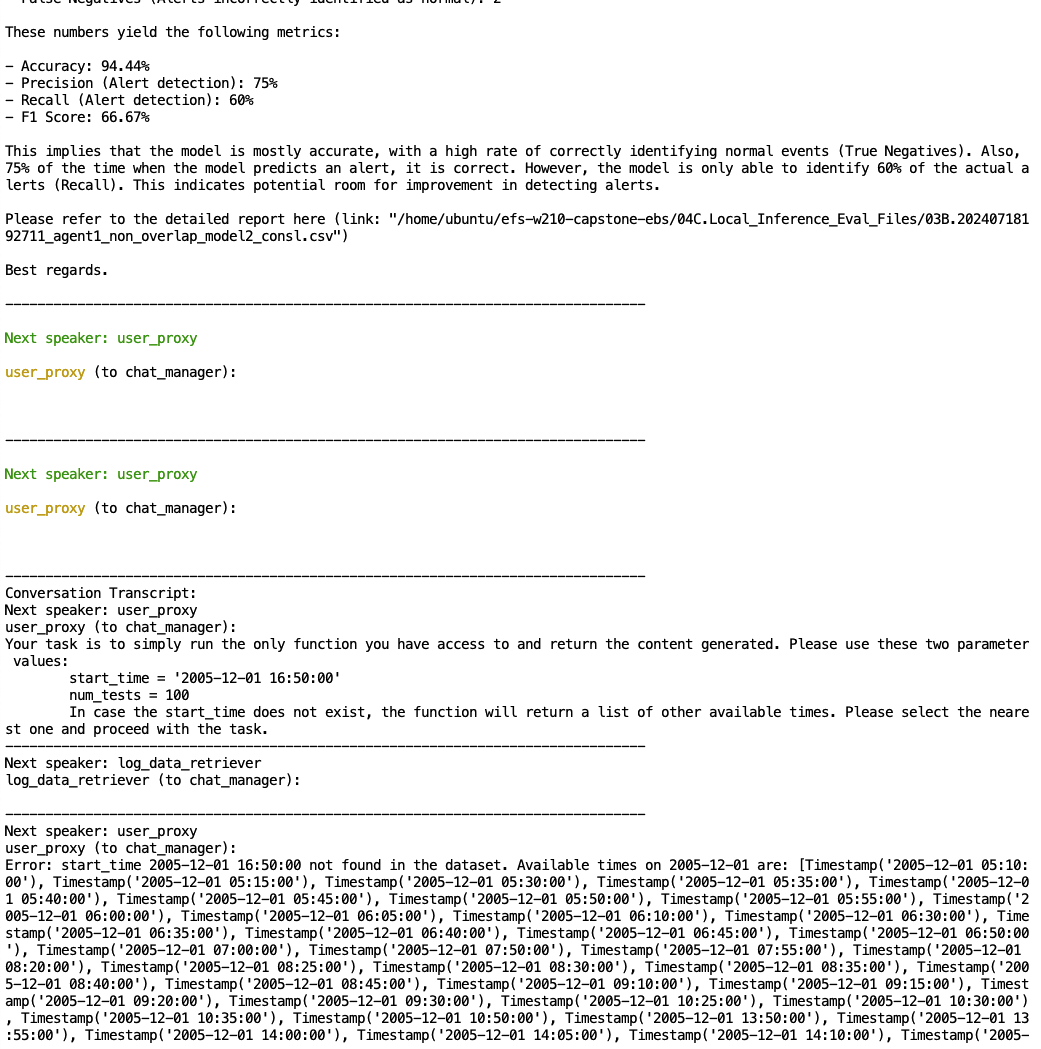